In [286]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from datetime import datetime

In [287]:
# to set data to its max width in a dataframe
pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)

<ipython-input-287-c4d982623a58>:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [288]:
df = pd.read_csv('Data Analyst - Test Data - US.csv', parse_dates=['date'])
df.head()

,Review,date,Location
0,"I was very impressed with the resort.\n Great staff at the main resort pool bar! We had a blast with them.\n Clean, professional staff, great location and very reasonable!\n \n Read more\n Read less",20/08/2019,Sebastian
1,The rooms were nice the outside needs work also no free breakfast it would have been nice overall it was ok\n \n Read more\n Read less,20/08/2019,Los Angeles
2,Great location! I have stayed at this hotel on my last three trips to New York.\n \n Read more\n Read less,20/08/2019,Georgia
3,The hotel was adequate for my stay. The strips in the bathtub were useless as I fell while taking a shower. I asked the front desk staff several times to get a bath mat but they never did. Management was unresponsive to my request which was very poor; someone should have gone to a dollar store and gotten a bath mat. Breakfast was good but it would have been nice to have had yogurt and/or cottage cheese on the buffet.\n \n Read more\n Read less,20/08/2019,NaN
4,"Great location, room was large and spacious. Parking was easy and we appreciated the friendly staff\n \n Read more\n Read less",19/08/2019,Palm Harbor


In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6448 entries, 0 to 6447
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review    6393 non-null   object
 1   date      6448 non-null   object
 2   Location  1711 non-null   object
dtypes: object(3)
memory usage: 151.2+ KB


In [302]:
df.isnull().sum() 


Review      55  
date        0   
Location    4737
year        0   
month       0   
dtype: int64

<AxesSubplot:>

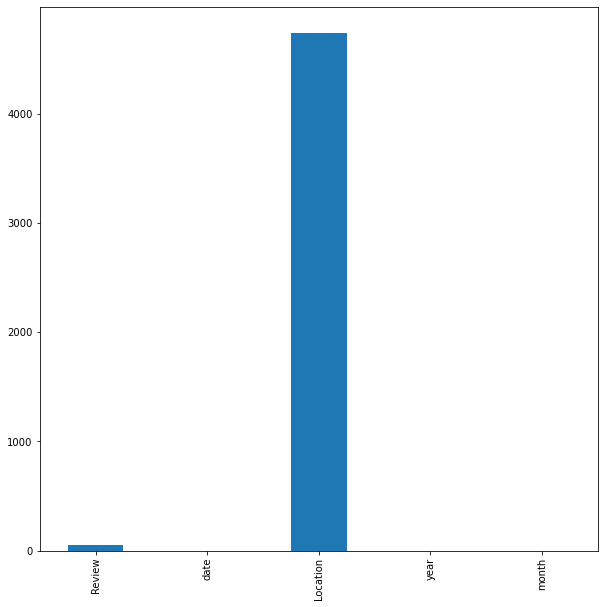

In [305]:
df.isnull().sum().plot(kind='bar', figsize=(10,10))

In [291]:
df.duplicated().sum()

4

In [292]:
df[df.duplicated()]

,Review,date,Location
2366,NaN,22/02/2019,NaN
2663,NaN,28/01/2019,NaN
2670,NaN,28/01/2019,NaN
2671,NaN,28/01/2019,NaN


It appears there are actually 3 dates that are duplciated. In the absence of other fields, there is no much value we can bring from dates merely.

### Assessment

1. There are 55 missing values in review
2. There are 4737 missing values in Location
3. Date is in string format. The data type is to be converted into Datetime type

In [293]:
# 3. There are certain values in 'MM-YYYY'  foramt and that needs to be parsedd and 
# Date is in string format. The data type is to be converted into Datetime type
from dateutil.parser import parse
import pandas as pd

for i in range(len(df['date'])):
    df['date'][i] = parse(df['date'][i])
df['date'] = pd.to_datetime(df['date']).dt.strftime("%d-%m-%Y")

In [294]:
df['date'] = pd.to_datetime(df['date'])

In [295]:
type(df['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

#### Cleaning:
1. There are 55 missing values in review column

Assumption: I am not going to drop since i am not going to use review column in my analysis

2. There are 4737 missing values in Location

In [296]:
miss_percent = df['Location'].isna().sum()/df.shape[0]
print ('Percentage of Missing Values in Location is : {}'.format(miss_percent*100))

Percentage of Missing Values in Location is : 73.46464019851116


This is huge number. this will impact the analysis while performing location wise. So, we would need to correct this from source

 ### Analysis:

Text(0.5, 1.0, 'Number of Review per Year')

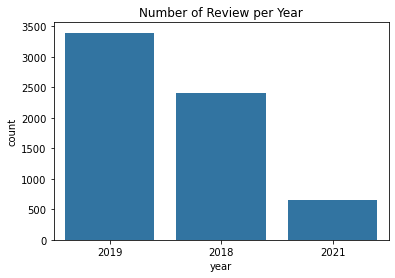

In [297]:
# analysing the reviews per year

df['year'] = pd.DatetimeIndex(df['date']).year
sns.countplot(data=df, x='year', color = base_color, order = gen_order_year)
plt.title('Number of Review per Year')

In [298]:
base_color = sns.color_palette()[0]
gen_order_year = df['year'].value_counts().index


#### per above figure, its understood that 2019 has got more visits to the hotel

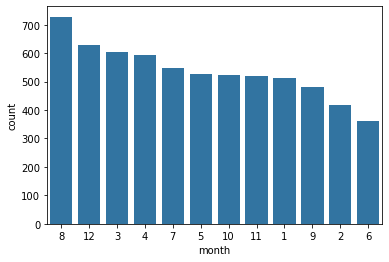

In [299]:
# analysing the reviews per month
df['month'] = pd.DatetimeIndex(df['date']).month
sns.countplot(data = df, x='month', color = base_color, order = gen_order_month)
gen_order_month = df['month'].value_counts().index

In [300]:
#### Per the above figure, its determined that the more visits happened in August

#### Time period of review considered

In [301]:
max_time = df['date'].max()
min_time = df['date'].min()
time_period = (max_time - min_time)
print (time_period)

1235 days 00:00:00
